In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

#Style para las visualizaciones
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

#Cargando la data
df = pd.read_csv(r"C:\Users\jrjim\Downloads\dataset_salud_500k\clean_dataset.csv")




Encontrando:
    1. Specialties mas visitadas
    2. Ciudad con el costo mas alto por visita
    3. Tasa de readmision dentro de 30 dias
    4. Procedimiento mas costoso
    5. Distribucion de costos por tipo de visita
    6. Division de generos segun especialidad


Most frequented specialty: Pediatría with 61990 visits
Top 5 specialties by visit count:
  1. Pediatría: 61990 visits
  2. Ginecología: 61807 visits
  3. Cirugía: 61797 visits
  4. Cardiología: 61470 visits
  5. Urgencias: 31006 visits


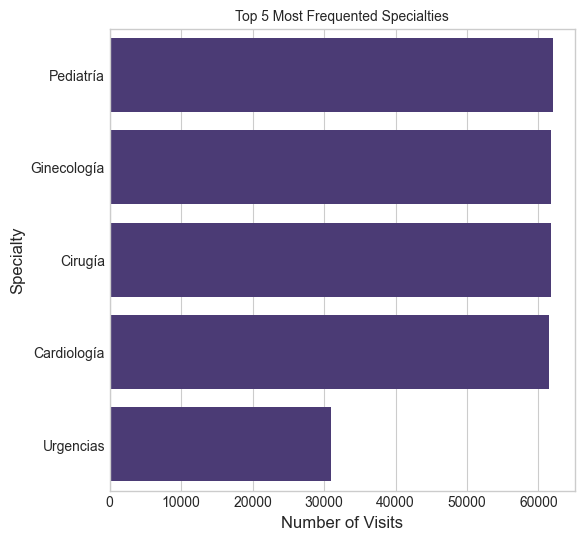

In [ ]:

fig = plt.figure(figsize=(6, 6))

#1.Specialties mas atendidas (top 5)
specialty_counts = df['specialty'].value_counts()
top_specialties = specialty_counts.head(5)

#Barplot
sns.barplot(x=top_specialties.values, y=top_specialties.index)
plt.title('Top 5 Most Frequented Specialties', fontsize=10)
plt.xlabel('Number of Visits', fontsize=12)
plt.ylabel('Specialty', fontsize=12)

#Resumen
most_frequented = specialty_counts.index[0]
most_frequented_count = specialty_counts.iloc[0]
print(f"Most frequented specialty: {most_frequented} with {most_frequented_count} visits")
print(f"Top 5 specialties by visit count:")
for i, (specialty, count) in enumerate(top_specialties[:5].items()):
    print(f"  {i+1}. {specialty}: {count} visits")


City with highest average cost per visit: Santiago ($2543.13)
Top 3 cities by average cost:
  1. Santiago: $2543.13 (based on 61609.0 visits)
  2. Quito: $2540.07 (based on 61622.0 visits)
  3. Bogotá: $2538.37 (based on 61835.0 visits)


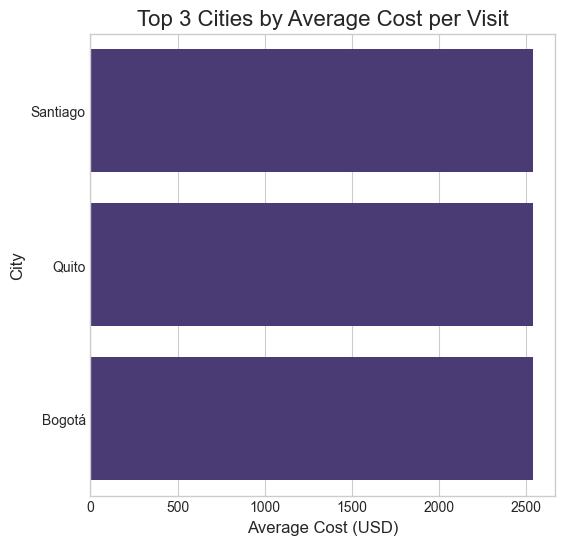

In [ ]:
#2.Ciudad con el costo mas alto por visita
# GroupBy city y average cost, tomando ciudades con 30 visitas o mas
city_costs = df.groupby('city').agg({
    'cost_usd': ['mean', 'count']
})
city_costs.columns = ['avg_cost', 'visit_count']
significant_cities = city_costs[city_costs['visit_count'] >= 30].sort_values('avg_cost', ascending=False)
top_cities_by_cost = significant_cities.head(3)

fig = plt.figure(figsize=(6, 6))

#Barplot
sns.barplot(x=top_cities_by_cost['avg_cost'], y=top_cities_by_cost.index)
plt.title('Top 3 Cities by Average Cost per Visit', fontsize=16)
plt.xlabel('Average Cost (USD)', fontsize=12)
plt.ylabel('City', fontsize=12)

#Resumen
highest_cost_city = significant_cities.index[0]
highest_avg_cost = significant_cities['avg_cost'].iloc[0]
print(f"City with highest average cost per visit: {highest_cost_city} (${highest_avg_cost:.2f})")
print(f"Top 3 cities by average cost:")
for i, (city, row) in enumerate(top_cities_by_cost[:5].iterrows()):
    print(f"  {i+1}. {city}: ${row['avg_cost']:.2f} (based on {row['visit_count']} visits)")

Overall 30-day readmission rate: 15.05%
Top 5 specialties by readmission rate:
  1. Ortopedia: 15.30% (based on 30754.0 visits)
  2. Pediatría: 15.23% (based on 61990.0 visits)
  3. Medicina Interna: 15.19% (based on 30814.0 visits)
  4. Neurología: 15.14% (based on 30829.0 visits)
  5. Cirugía: 15.07% (based on 61797.0 visits)


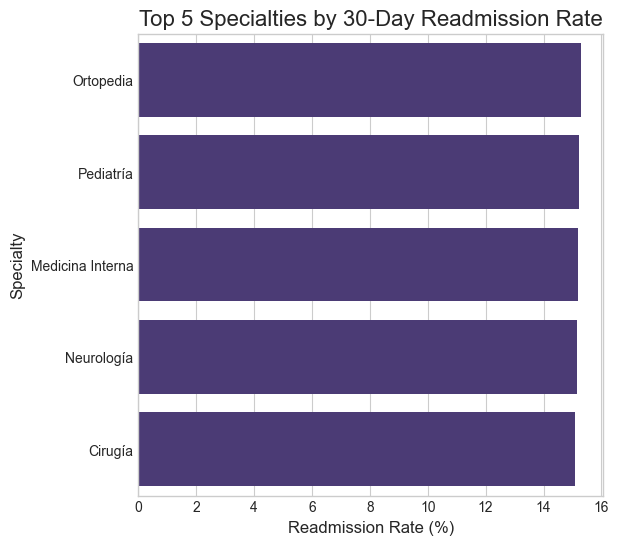

In [ ]:
#3.Tasa de readmision dentro de 30 dias

#Rate
overall_readmission_rate = df['readmission_within_30_days'].mean() * 100

#Rate por specialty
specialty_readmissions = df.groupby('specialty').agg({
    'readmission_within_30_days': ['mean', 'count']
})
specialty_readmissions.columns = ['readmission_rate', 'visit_count']
specialty_readmissions['readmission_percentage'] = specialty_readmissions['readmission_rate'] * 100

#Specialties con 30 o mas visitas
significant_specialty_readmissions = specialty_readmissions[specialty_readmissions['visit_count'] >= 30]
top_readmission_specialties = significant_specialty_readmissions.sort_values('readmission_percentage', ascending=False).head(5)

fig = plt.figure(figsize=(6, 6))

#Barplot de readmission rates por specialty
sns.barplot(x=top_readmission_specialties['readmission_percentage'], y=top_readmission_specialties.index)
plt.title('Top 5 Specialties by 30-Day Readmission Rate', fontsize=16)
plt.xlabel('Readmission Rate (%)', fontsize=12)
plt.ylabel('Specialty', fontsize=12)


print(f"Overall 30-day readmission rate: {overall_readmission_rate:.2f}%")
print(f"Top 5 specialties by readmission rate:")
for i, (specialty, row) in enumerate(top_readmission_specialties[:5].iterrows()):
    print(f"  {i+1}. {specialty}: {row['readmission_percentage']:.2f}% (based on {row['visit_count']} visits)")


Procedure with highest cost: Voluptatum. ($7587.16)
Top 5 procedures by maximum cost:
  1. Voluptatum.: $7587.16 (avg: $2523.95, count: 1224.0)
  2. A dicta.: $7587.16 (avg: $2278.76, count: 7.0)
  3. Reprehenderit nemo.: $7587.16 (avg: $3285.06, count: 5.0)
  4. Reprehenderit mollitia.: $7587.16 (avg: $2984.78, count: 9.0)
  5. Doloremque inventore.: $7587.16 (avg: $2477.02, count: 7.0)


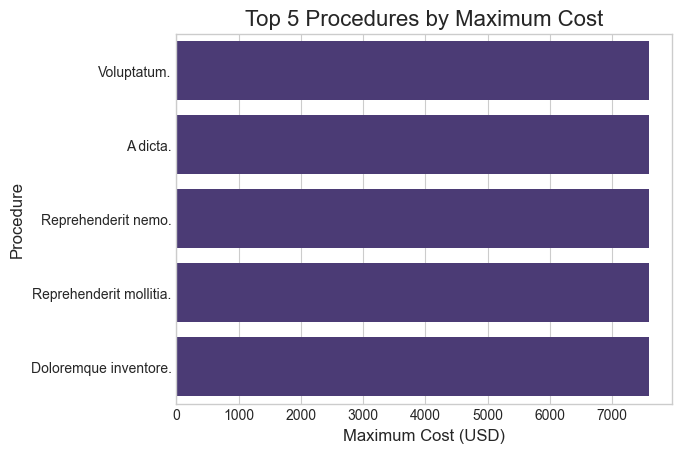

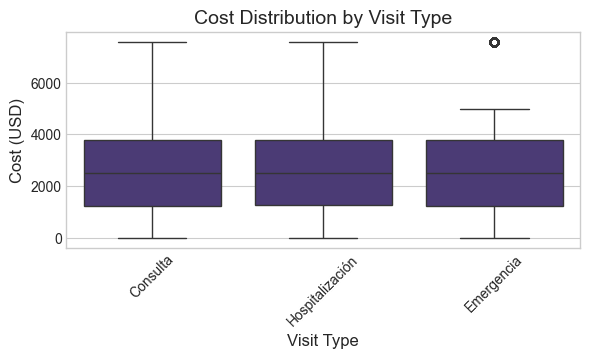

In [ ]:
#4.Procedure mas costoso

# GroupBy procedure y  maximum cost, only consider procedures with at least 5 instances
procedure_costs = df.groupby('procedure').agg({
    'cost_usd': ['max', 'mean', 'count']
})
procedure_costs.columns = ['max_cost', 'avg_cost', 'count']
significant_procedures = procedure_costs[procedure_costs['count'] >= 5].sort_values('max_cost', ascending=False)
top_procedures_by_cost = significant_procedures.head(5)

#Barplot
sns.barplot(x=top_procedures_by_cost['max_cost'], y=top_procedures_by_cost.index)
plt.title('Top 5 Procedures by Maximum Cost', fontsize=16)
plt.xlabel('Maximum Cost (USD)', fontsize=12)
plt.ylabel('Procedure', fontsize=12)

#Resumen
highest_cost_procedure = significant_procedures.index[0]
highest_procedure_cost = significant_procedures['max_cost'].iloc[0]
print(f"Procedure with highest cost: {highest_cost_procedure} (${highest_procedure_cost:.2f})")
print(f"Top 5 procedures by maximum cost:")
for i, (procedure, row) in enumerate(top_procedures_by_cost[:5].iterrows()):
    print(f"  {i+1}. {procedure}: ${row['max_cost']:.2f} (avg: ${row['avg_cost']:.2f}, count: {row['count']})")


plt.figure(figsize=(6, 6))


#Boxplot Costos por tipo de visita
plt.subplot(2, 1, 1)
sns.boxplot(x='visit_type', y='cost_usd', data=df)
plt.title('Cost Distribution by Visit Type', fontsize=14)
plt.xlabel('Visit Type', fontsize=12)
plt.ylabel('Cost (USD)', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()



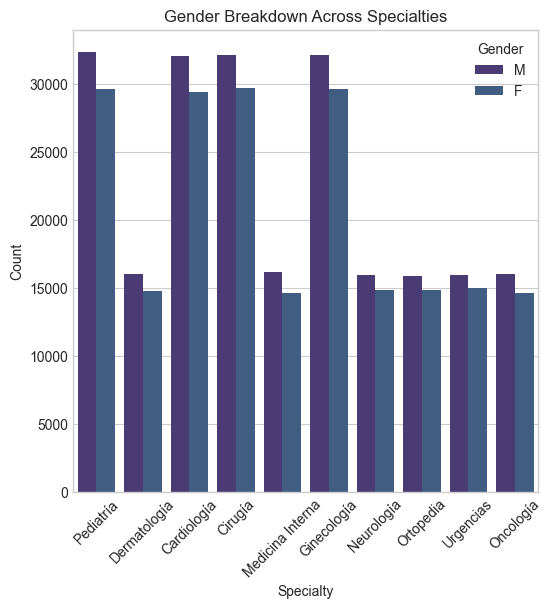

In [ ]:
#Division de generos segun especialidad
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='specialty', hue='gender')
plt.title('Gender Breakdown Across Specialties')
plt.xlabel('Specialty')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()